In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (7.0, 5.0)
import numpy as np
from scipy.optimize import curve_fit

# FINAL PARAMETERS
---

Para O4-C22-C23-C24 

-Metodologia para carga RESP  
-Conformaciones (14.4 °) 
-MP2/6-31G(d)||B3LYP/6-31+G*  
Originales (AMBER)   
(o -c -ce-cf)*Kp =   2.1750 kcal/mol,  Np = 2.0000,  Phase = 180.0001 Deg

Finales  
(o -c -ce-cf)*Kp =   3.225 kcal/mol,  Np = 2.0000,  Phase = 180.0001 Deg 

Para C-C=C-C  
Finales  
(Se adicionaron dos terminos mas a la topologia)  
       (ce-cf-cf-ce)*Kp =   1.3238 kcal/mol,  Np = 1.0000,  Phase = 180.0001 Deg   
       (ce-cf-cf-ce)*Kp =   2.4656 kcal/mol,  Np = 2.0000,  Phase = 180.0001 Deg   
       (ce-cf-cf-ce)*Kp =   0.4658 kcal/mol,  Np = 3.0000,  Phase = 180.0001 Deg   



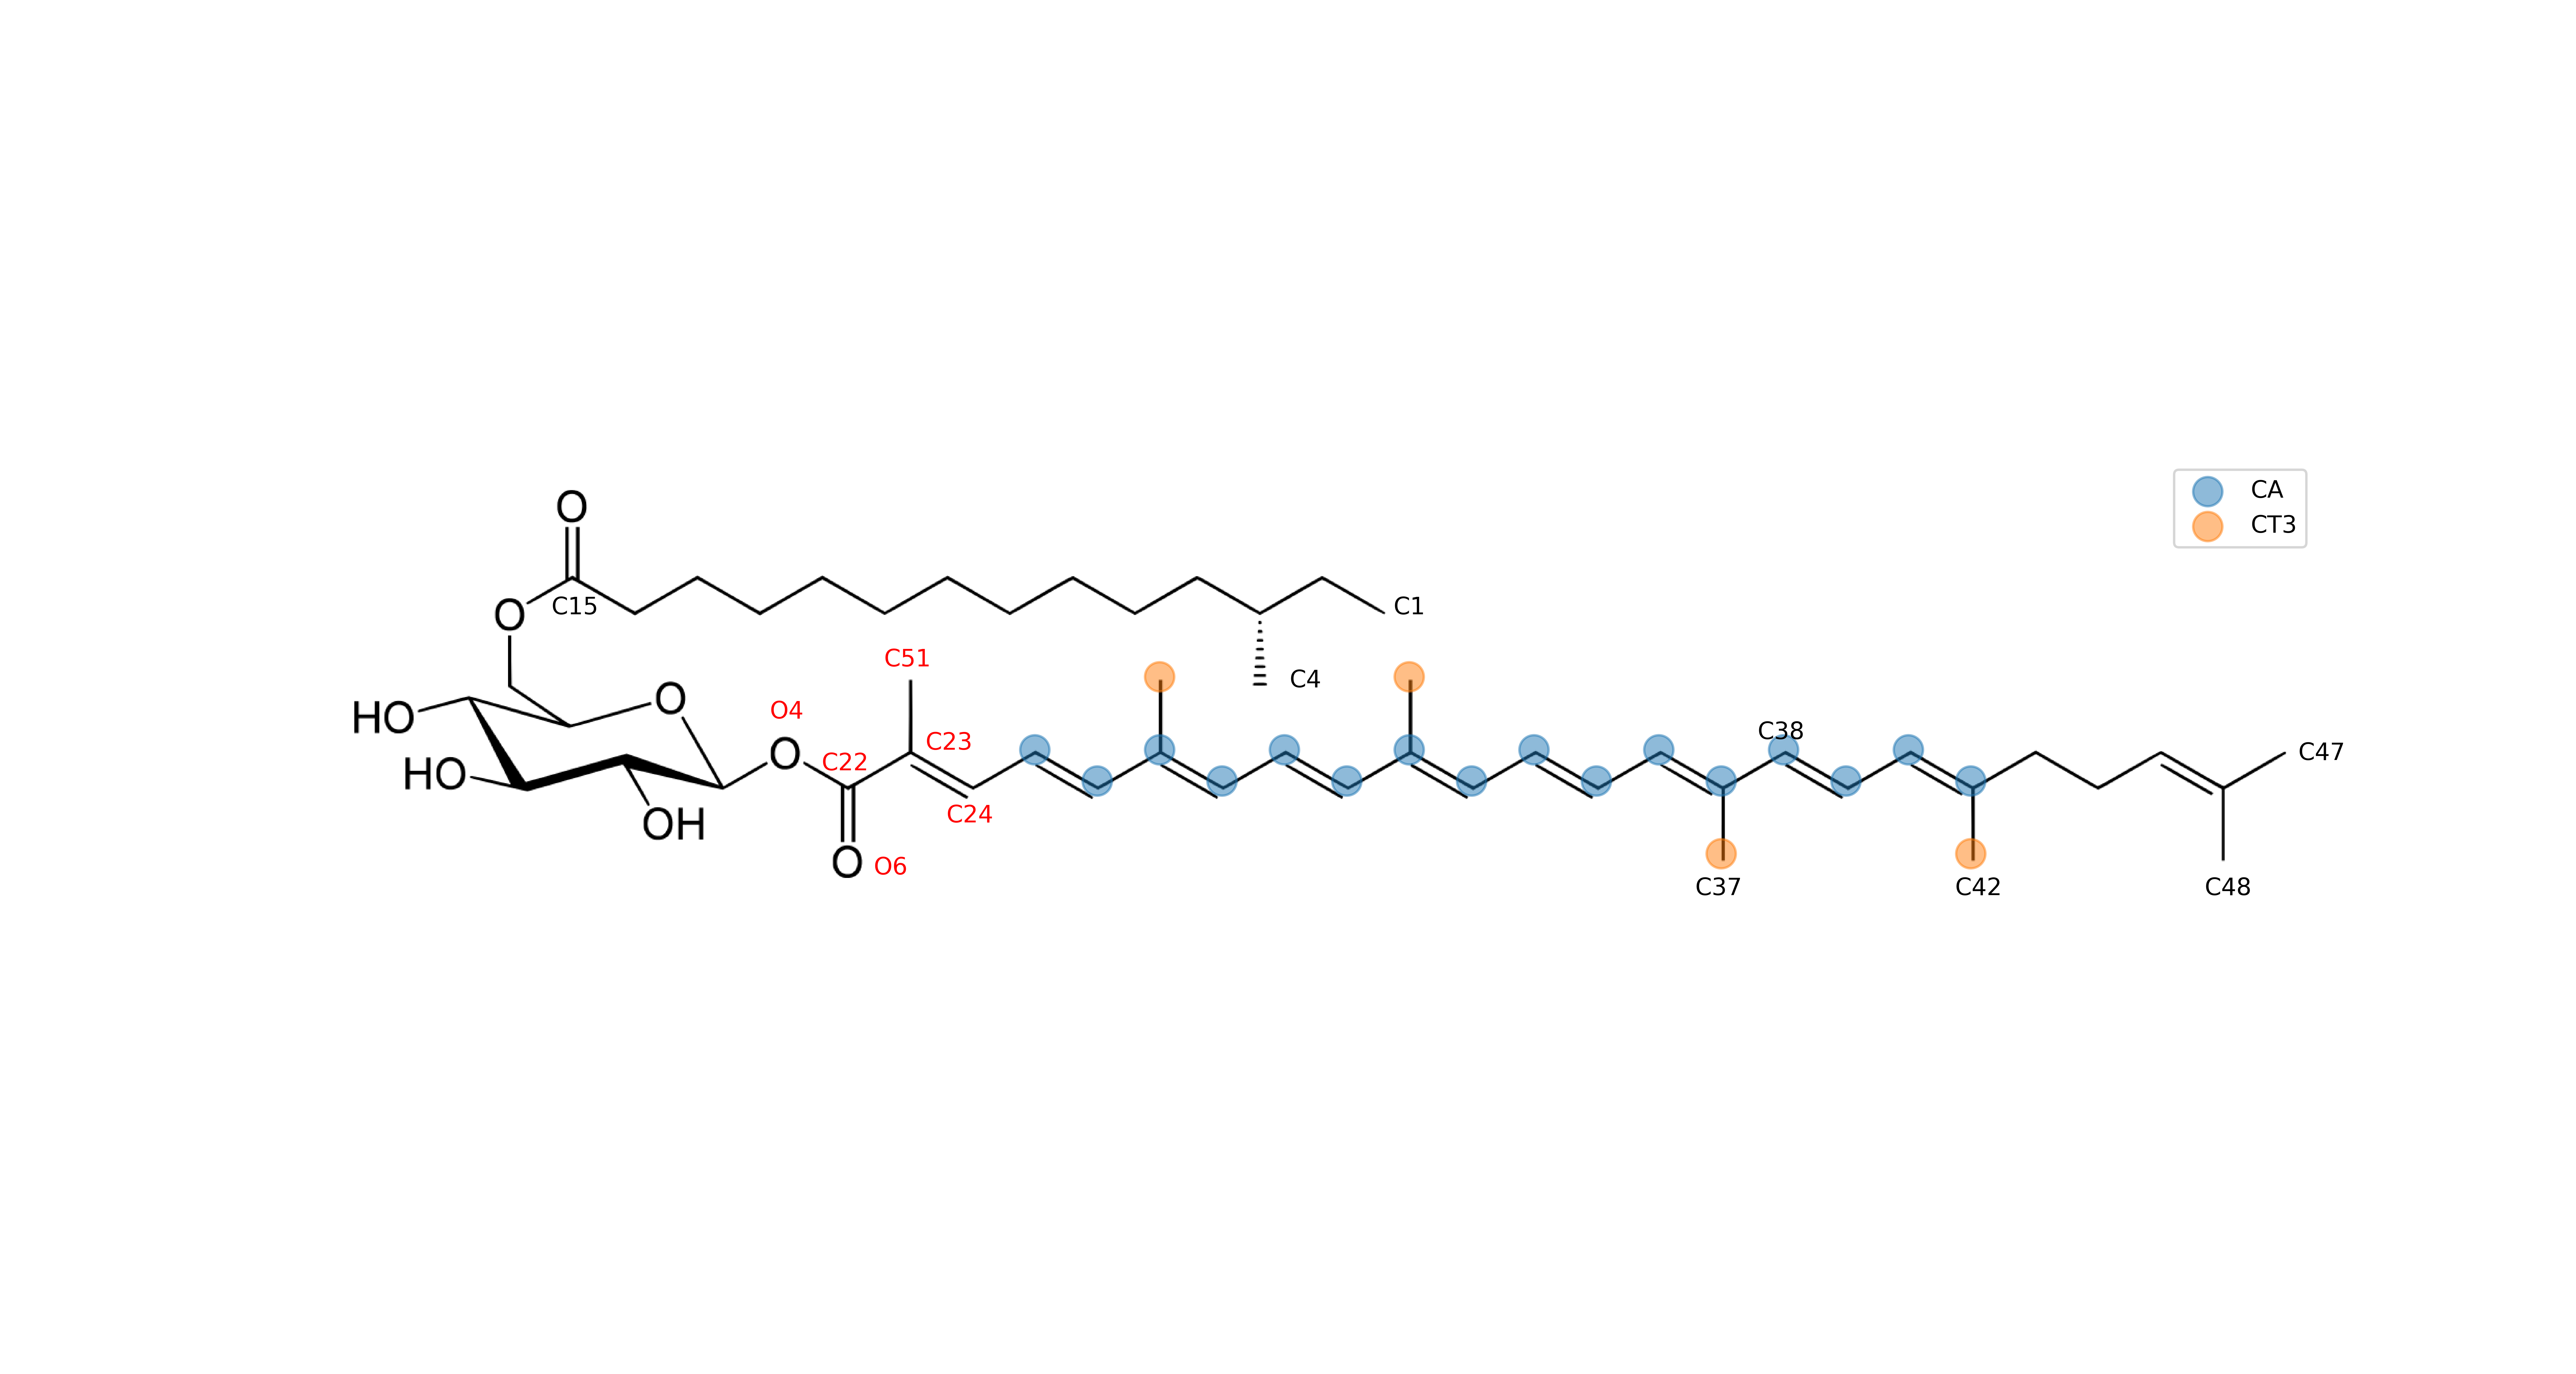

In [2]:
from IPython.display import Image
Image("./stx_problems.png")

# Parametros de amber de Julian 
---
AMBER Barrier (kcal/mol)
/hpcfs/home/dr.figueroa10/FFParmOpt/DATOS_Pre/STX_1.frcmod 

parametrizado con GAFF2 y metodologia RESP para las cargas (.log en archivos)

o -c -ce-cf   4    8.700       180.000           2.000  
O3-C2-C1-C77 ( en atom index )  
parametros para el dihedoro analizado en O5 C22 C23 C24  

Documentacion de parametros de amber. (cluster)  
vi /lustre/apps/anaconda/2/envs/18-amber/dat/leap/parm/gaff2.dat  


# Parametros de CHARMM 
---
/home/UANDES/dr.figueroa10/Documentos/FFParams/JohnErick/PARAMSCHARMGUI/STX_charmm/gromacs  
grep CG2DC1 charmm36_new.itp  | grep OG2D1  

CG2DC1  CG2DC1   CG2O2   OG2D1     9  1.800000e+02  5.857600e+00      2(multiplicad)  



(OG2D-CG2O-CG2D-CG2D)

(OG302-CG2O-CG2D-CG2D)

k CHARMM  1.4034878165312947
Max val CHARMM 2.8069756330625895
k AMBER  2.175
Max val AMBER 4.35


Text(0, 0.5, 'K (Kcal/mol)')

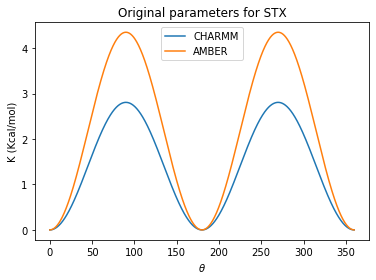

In [3]:
def dieh_CHARM(theta,phi,n,k):
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    print("k CHARMM ", k)
    print("Max val CHARMM", max(dihedral_CHARM))
    plt.plot(thetha,dihedral_CHARM,label="CHARMM")
    plt.grid()
    #return deihdral
def dieh_plot(theta,phi,n,k,label):
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    plt.plot(thetha,dihedral_CHARM,label=label)
    plt.grid()
    plt.legend()
def dieh_AMBER(theta,phi,n,k):
    dihedral_AMBER = k*(1+np.cos((n*theta-phi)*np.pi/180))
    print("k AMBER ", k)
    print("Max val AMBER",max(dihedral_AMBER))
    plt.plot(thetha,dihedral_AMBER,label="AMBER")
    plt.legend()
    plt.grid()
plt.figure()
thetha= np.arange(0,360,0.1)
dieh_CHARM(thetha,180,2,(5.875/4.186))
## amber frcmod X-X-X-X 4(divider) 8.7(barrier) 180 (phase) 2(multiplicity)
## k = (barrier/divider)
dieh_AMBER(thetha,180,2,(8.7/4))

plt.title("Original parameters for STX")
plt.xlabel(r'$\theta$')
plt.ylabel("K (Kcal/mol)")

# General form for dihedrals

\begin{equation*}
\sum_{k=1}^{dihedrals} K[1 + cos(n_p\theta - \phi)] 
\end{equation*}  
$AMBER_{GAFF2}  barrier = 2.175  kcal/mol$  
$CHARMM  barrier  = 1,46875  kcal/mol$


# Does the charge derivation affect the parameters optimization ? 
--- 
- For AMBER.
    - bcc ( semi-empirical method for charge derivation)
        - $ k = 1,5408, \phi =-15,6053 , n_p =1,9266$
        - $ k = 1,4989, \phi =-0,6432  $ $(n_p =2)$	
    - RESP ( based on HF and Mulliken charges ) 
        - $ k = 1,5503, \phi =-16,1606 , n_p =1,9328$
        - $ k = 1,5057, \phi =-3.2668 $	$(n_p =2)$	
    

# Optimization of paramfit parameters
---
- Genetic Algorithm 
    1. Generations_to_conv = 20 
    2. Search Space (0.25 -0.75) - Same minima 
    3. Algorithm = BOTH ( simplex and genetic) aceleraters convergence - Same minima

  # Optimization of $k ,n_p$ and $\phi$ 
 


|            	|        	|  B3LYP	|          	|        	|   MP2   	|          	|             	|
|:----------:	|:------:	|:------:	|:--------:	|:------:	|:-------:	|:--------:	|:-----------:	|
|         Structure   	| $k$(kcal/mol)   | $n_p$      | $\phi$       | $k$(kcal/mol)     | $n_p$     | $\phi$      | $\Delta E_{(MP2 – B3LYP}$ |
| Conj Chain 	| 1,7119 	| 1,8659 	| -25,8033 	| 1,9039 	|  1,8834 	| -21,4799 	|    0,192    	|
|    CutL0   	| 1,7445 	| 1,8425 	| -31,2315 	| 1,9408 	|  1,7445 	| -39,4837 	|    0,1963   	|
|  CutL0_OH  	| 1,7342 	|  1,821 	| -39,4837 	| 1,9117 	| 1,18671 	| -32,9671 	|    0,1775   	|
|   CutL02   	| 1,6771 	|  1,795 	|  -48,026 	|  1,867 	|  1,8419 	|  32,6021 	|    0,1899   	|
|  CutL02_OH 	| 1,6736 	|  1,836 	| -48,4829 	| 1,8676 	|  1,8534 	| -36,6469 	|    0,194    	|
|     L0     	| 1,5408 	| 1,9266 	| -15,6053 	|   Running     	|    Running     	|   Running       	|             	|



# Optimization of $k $ and $\phi$ with fixed $n_p$

|           	|    B3LYP |	          	|   MP2  	|          	|             	|
|:---------:	|:------:	|:--------:	|:-------:	|:--------:	|-------------	|
|           	|   $k$(kcal/mol) 	|    $\phi$    	|   $k$(kcal/mol)    	|    $\phi$    	| $\Delta E_{(MP2 – B3LYP}$ 	|
|   CutL0   	| 1,5881 	|  -6,9156 	|  1,7871 	|  -2,103  	|    0,199    	|
|  CutL0_OH 	| 1,6108 	| -14,7296 	|  1,7825 	|  -9,7438 	|    0,1717   	|
|   CutL02  	| 1,4936 	|  -10,203 	|  1,7181 	|  -3,2337 	|    0,2245   	|
| CutL02_OH 	| 1,5306 	|   -21,4  	|  1,7254 	|  -11,26  	|    0,1948   	|
|     L0    	| 1,4989 	|  -0,6432 	| Running 	| Running 	|             	|

 <h1  align="center"> Optimization of $k $ with fixed $\phi$ and $n_p$</h1>

|           	|   B3LYP  	|   Mp2  	|             	|
|:---------:	|:------:	|:------:	|:-----------:	|
|           	|     $k$(kcal/mol)   	|     $k$(kcal/mol)    	|  $\Delta E_{(MP2 – B3LYP}$  	|
|   CutL0   	| 0,8717 	| 0,6552 	|    0,2165   	|
|  CutL0_OH 	| 0,8751 	| 0,6888 	|    0,1863   	|
|   CutL02  	| 0,9865 	| 0,7339 	|    0,2526   	|
| CutL02_OH 	| 0,9851 	| 0,7584 	|    0,2267   	|
|     L0    	| 1,0387 	|    no_data  	|     NA        	|
|     L0_SP_Cal |1.1784    | 0.8991    |     0.2793            |  

# B3LYP/MP2 ( PARAMETROS FINALES SCIPY ) 
---

# for CORD1 

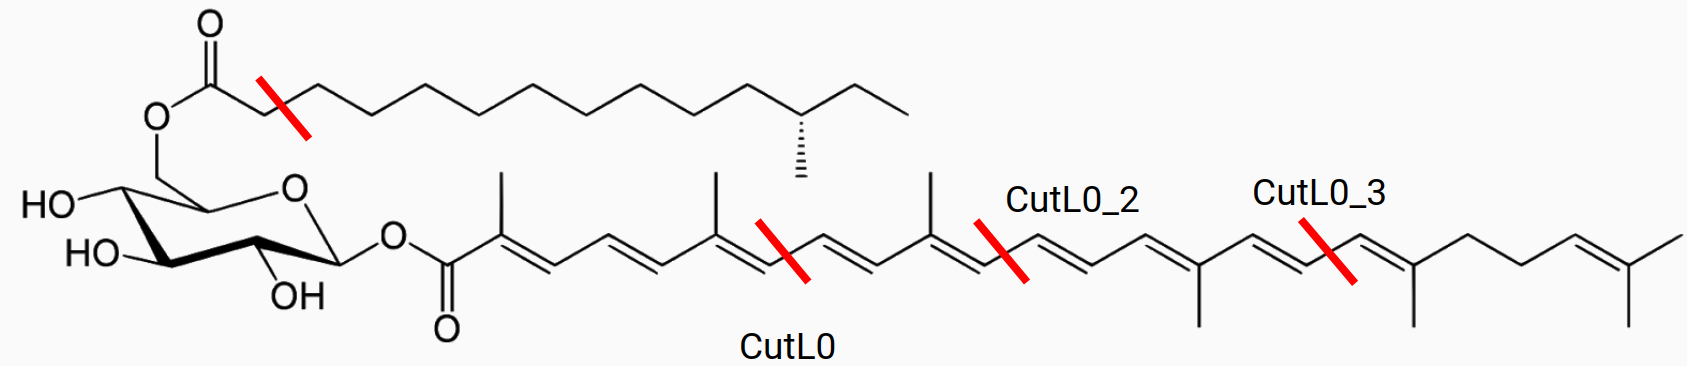

# All atoms molecule

In [4]:
def Dieh_1ter(x,k1):
    return k1*(1+np.cos((2*x-180)*np.pi/180))
def Dieh_2ter(x,k1,k2):
    return k1*(1+np.cos((2*x-180)*np.pi/180)) + k2*(1+np.cos((2*x-180)*np.pi/180))

# Data of B3LYP_SP after B3LYP_SCAN_all atoms (?)

[4.00045973]


Text(0.5, 0, '$\\phi$')

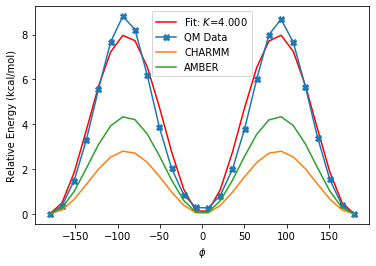

In [5]:
L0_dat_CORD1 = np.genfromtxt("./SP_B3LYP.dat")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(26):
    Dieh.append(init_Dieh-(i*14.4))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# FIT b3LYP from SCAN


[3.618779]


Text(0.5, 0, '$\\phi$')

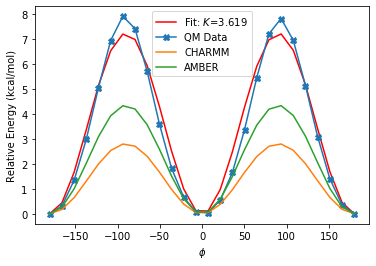

In [6]:
L0_dat_CORD1 = np.genfromtxt("./data_scan_b3lyp.txt")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(26):
    Dieh.append(init_Dieh-(i*14.4))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# B3LYP 6-31G* || MP2 6-31 G*

In [7]:
L0_dat_CORD1 = np.genfromtxt("./CORD1_QM_DATA.dat")
# data from B3LYP|| MP2  6-31

In [8]:
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(26):
    Dieh.append(init_Dieh-(i*14.4))

[3.22552326]


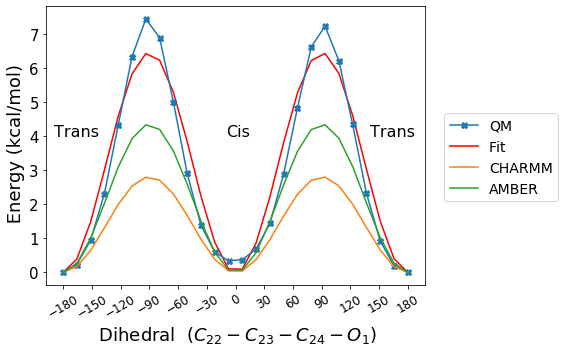

In [79]:

popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure(figsize=(8,5))
p1, =plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r')#,label=('Fit'))
p2, = plt.plot(Dieh,CORD1_Norm,marker="X")
p3, = plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)))
p4, =plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)))
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend((p2,p1,p3,p4),("QM","Fit","CHARMM","AMBER"),loc=(1.05,0.3),fontsize=14)
plt.yticks(fontsize=15)
plt.xticks(fontsize=12)
plt.xticks(np.arange(-180, 181, 30.0),rotation=30)
plt.ylabel(" Energy (kcal/mol)",fontsize=18)
plt.xlabel(' Dihedral  ($C_{22} - C_{23} - C_{24} - O_1$)',fontsize=18)
plt.tight_layout()
plt.text(-10,4,"Cis",fontsize=16)
plt.text(140,4,"Trans",fontsize=16)
plt.text(-190,4,"Trans",fontsize=16)
plt.savefig("QM_parameters.jpg")

[3.22552326]


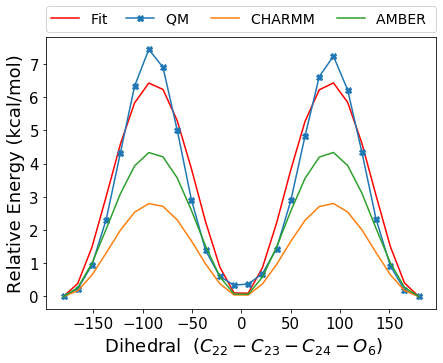

In [42]:

popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure(figsize=(7,5))
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit'))
plt.plot(Dieh,CORD1_Norm,label='QM ',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM ")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER ")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(1.05,0.3))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Relative Energy (kcal/mol)",fontsize=18)
plt.xlabel(' Dihedral  ($C_{22} - C_{23} - C_{24} - O_6$)',fontsize=18)

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.,fontsize=14)
plt.savefig("QM_parameters2.jpg")

# fit with two cosines in dihedral term 

[1.55471114 1.67081212]


Text(0.5, 0, '$\\phi$')

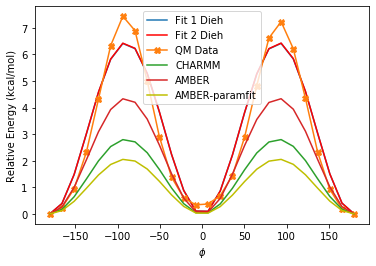

In [10]:
popt, pcomv = curve_fit(Dieh_2ter,Dieh,CORD1_Norm,p0=[1,1],bounds=((0,0),(100,100)))
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,3.22),label='Fit 1 Dieh')
plt.plot(Dieh,Dieh_2ter(Dieh,*popt),c='r',label='Fit 2 Dieh')
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')


# CUT_L0_2/

## data MP2 full scan

[3.10059638]


Text(0.5, 0, '$\\phi$')

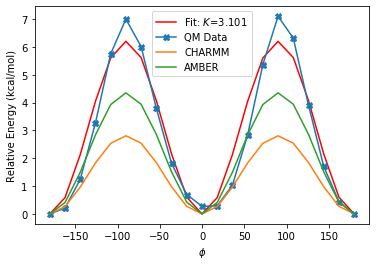

In [11]:
L0_dat_CORD1 = np.genfromtxt("./data_CutL02_mp2_fullScan.txt")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(21):
    Dieh.append(init_Dieh-(i*18))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# data from B3LYP|| MP2  6-31

[3.86187407]


Text(0.5, 0, '$\\phi$')

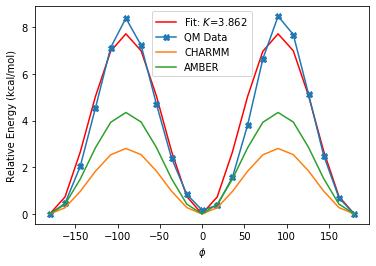

In [85]:
L0_dat_CORD1 = np.genfromtxt("./b3lyp_scan_CUTL02.txt")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(21):
    Dieh.append(init_Dieh-(i*18))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# data from B3LYP|| MP2  6-31+G

[2.66834765]


Text(0.5, 0, '$\\phi$')

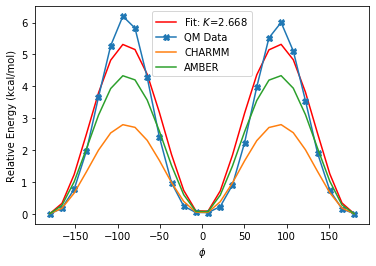

In [86]:
L0_dat_CORD1 = np.genfromtxt("./6_31_plusG_b3mp2_dat.dat")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD1_Norm=[]
for i in L0_dat_CORD1.tolist():
    CORD1_Norm.append((i-L0_dat_CORD1[0])*627.5)
for i in range(26):
    Dieh.append(init_Dieh-(i*14.4))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CORD1_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CORD1_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# Data b3lyp full scan 

In [87]:
Cut_L0_2_B3Mp2 = np.genfromtxt("./CORD_6_31G_d_CUTL02.dat")
# data from B3LYP|| MP2  6-31

In [88]:
init_Dieh=179.8675
Dieh =[]
Cut_L0_2_B3Mp2_kcal=[]
for i in Cut_L0_2_B3Mp2.tolist():
    Cut_L0_2_B3Mp2_kcal.append(((i-Cut_L0_2_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))

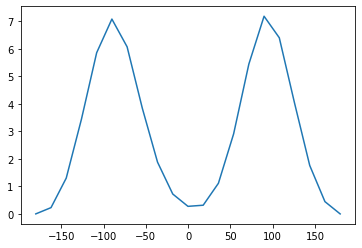

In [89]:
plt.plot(Dieh,Cut_L0_2_B3Mp2_kcal)

[3.15383749]


Text(0.5, 0, '$\\phi$')

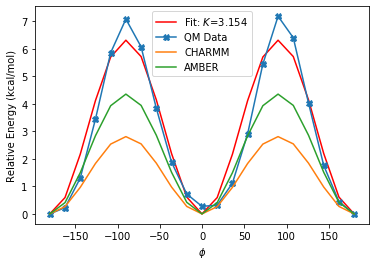

In [90]:
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_2_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_2_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#lt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# data from B3LYP|| MP2  6-311+G*

[2.54585644]


Text(0.5, 0, '$\\phi$')

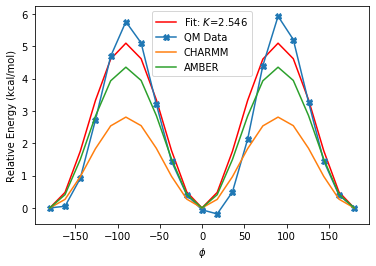

In [91]:
Cut_L0_2_B3Mp2 = np.genfromtxt("./CUTL0_2_6_311Gd.dat")
init_Dieh=179.8675
Dieh =[]
Cut_L0_2_B3Mp2_kcal=[]
for i in Cut_L0_2_B3Mp2.tolist():
    Cut_L0_2_B3Mp2_kcal.append(((i-Cut_L0_2_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))
    
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_2_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_2_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#lt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# CUT_L0_2_OH

# FULL MP2 SCAN 

[3.09890215]


Text(0.5, 0, '$\\phi$')

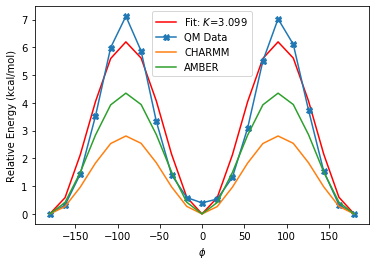

In [18]:

Cut_L0_2OH_B3Mp2 = np.genfromtxt("./Mp2_Scan_CutL0_2_Oh.txt")
init_Dieh=179.8675
Dieh =[]
Cut_L0_2OH_B3Mp2_kcal=[]
for i in Cut_L0_2OH_B3Mp2.tolist():
    Cut_L0_2OH_B3Mp2_kcal.append(((i-Cut_L0_2OH_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_2OH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_2OH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# B3LYP 6-31 || MP2 

In [19]:
Cut_L0_2OH_B3Mp2 = np.genfromtxt("./CUT_L0_2OH_6_31Gd.dat")
# data from B3LYP|| MP2  6-31

In [20]:
init_Dieh=179.8675
Dieh =[]
Cut_L0_2OH_B3Mp2_kcal=[]
for i in Cut_L0_2OH_B3Mp2.tolist():
    Cut_L0_2OH_B3Mp2_kcal.append(((i-Cut_L0_2OH_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))

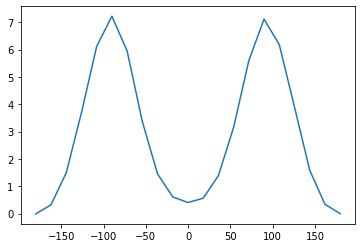

In [21]:
plt.plot(Dieh,Cut_L0_2OH_B3Mp2_kcal)

[3.15673793]


Text(0.5, 0, '$\\phi$')

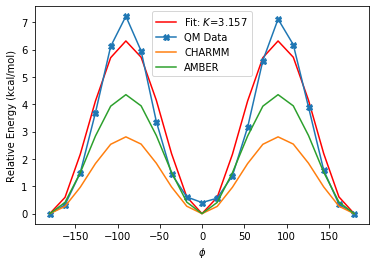

In [22]:
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_2OH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_2OH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# CUT_L0_3

In [23]:
Cut_L0_3_B3Mp2 = np.genfromtxt("./CORD1_CUT_3_OH_QM_Dat_Hyb.dat")
# data from B3LYP|| MP2  6-31

In [24]:
init_Dieh=179.8675
Dieh =[]
Cut_L0_3_B3Mp2_kcal=[]
for i in Cut_L0_3_B3Mp2.tolist():
    Cut_L0_3_B3Mp2_kcal.append(((i-Cut_L0_3_B3Mp2[-1])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))

[3.81714302]


Text(0.5, 0, '$\\phi$')

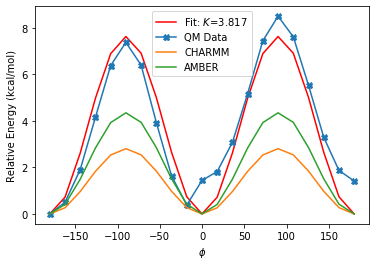

In [25]:
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_3_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_3_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

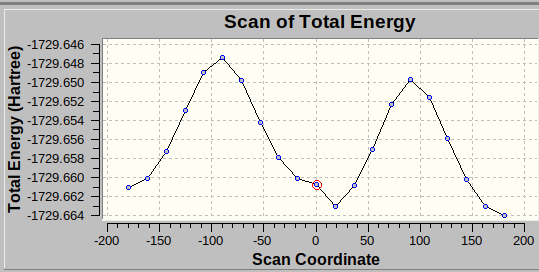

# CJ_CHAIN 

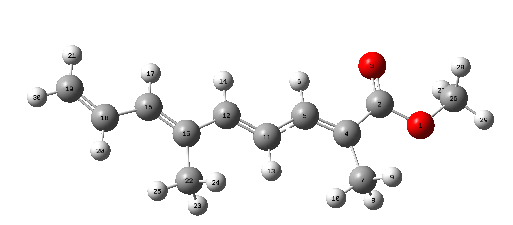

# B3LYP full scan 

[3.76934443]


Text(0.5, 0, '$\\phi$')

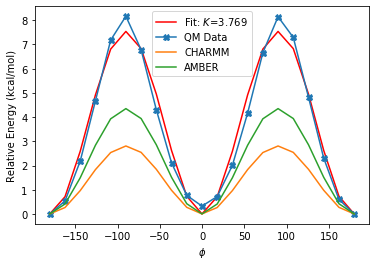

In [26]:
Cut_L0_2OH_B3Mp2 = np.genfromtxt("./b3lyp_full_scan_conj_chain.txt")
init_Dieh=179.8675
Dieh =[]
Cut_L0_2OH_B3Mp2_kcal=[]
for i in Cut_L0_2OH_B3Mp2.tolist():
    Cut_L0_2OH_B3Mp2_kcal.append(((i-Cut_L0_2OH_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,Cut_L0_2OH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,Cut_L0_2OH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# B3LYP 6-31G* || MP2 6-31G*

In [92]:
CJ_CH_B3Mp2 = np.genfromtxt("./COnJCha_6_31Gd.dat")
# data from B3LYP|| MP2  6-31

In [93]:
init_Dieh=179.8675
Dieh =[]
CJ_CH_B3Mp2_kcal=[]
for i in CJ_CH_B3Mp2.tolist():
    CJ_CH_B3Mp2_kcal.append(((i-CJ_CH_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))

[3.12799225]


Text(0.5, 0, '$\\phi$')

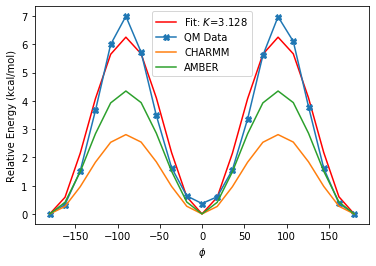

In [94]:
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CJ_CH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CJ_CH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# B3LYP 6-31G* || MP2 6-311+G*

[2.41817811]


Text(0.5, 0, '$\\phi$')

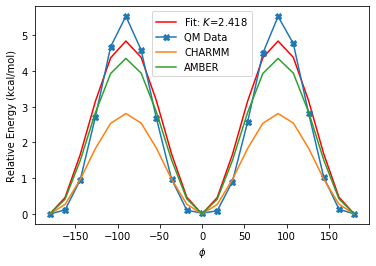

In [30]:
CJ_CH_B3Mp2 = np.genfromtxt("./COnChain_6_311G_plus.dat")
init_Dieh=179.8675
Dieh =[]
CJ_CH_B3Mp2_kcal=[]
for i in CJ_CH_B3Mp2.tolist():
    CJ_CH_B3Mp2_kcal.append(((i-CJ_CH_B3Mp2[0])*627.5))
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CJ_CH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CJ_CH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# MP2_Calc _all atoms 


[3.07459662]


Text(0.5, 0, '$\\phi$')

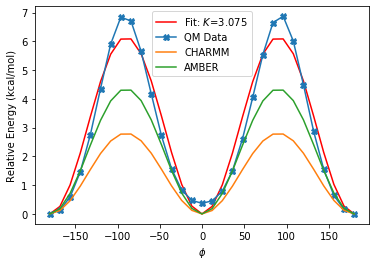

In [31]:
CJ_CH_B3Mp2 = np.genfromtxt("./Mp2_Conj_Chain_all.dat")
init_Dieh=179.8675
Dieh =[]
CJ_CH_B3Mp2_kcal=[]
for i in CJ_CH_B3Mp2.tolist():
    CJ_CH_B3Mp2_kcal.append(((i-CJ_CH_B3Mp2[0])*627.5))
for i in range(31):
    Dieh.append(init_Dieh-(i*12.0))
popt, pcomv = curve_fit(Dieh_1ter,Dieh,CJ_CH_B3Mp2_kcal,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label=('Fit: $K $=%5.3f' % tuple(popt)))
plt.plot(Dieh,CJ_CH_B3Mp2_kcal,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
#plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')



# CORD 2 C-C=C-C

In [95]:
CORD2_data = np.genfromtxt("./CORD2_QM_DATA.dat")
#Data extraction and preparation
init_Dieh=179.8675
Dieh =[]
CORD2_Norm=[]
for i in CORD2_data.tolist():
    CORD2_Norm.append((i-CORD2_data[0])*627.5)
for i in range(26):
    Dieh.append(init_Dieh-(i*14.4))

In [96]:
def tor_3_term_fix_n_fix_phi(x,k1,k2,k3):
    return (k1*(1+np.cos((1*x-0)*np.pi/180)) + k2*(1+np.cos((2*x-180)*np.pi/180))+k3*(1+np.cos((3*x-0)*np.pi/180)))

[k1  , k2  , k3 ]
[1.13617548 2.31581858 1.00188739]


Text(0.5, 0, '$\\phi$')

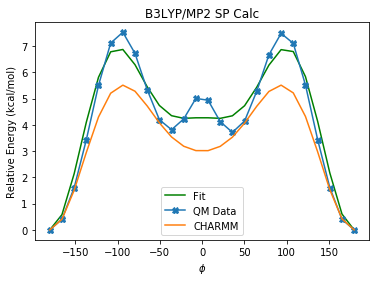

In [97]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n_fix_phi,Dieh,CORD2_Norm,p0=[10,10,10],bounds=((0,0,0),(50,50,50)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1  , k2  , k3 ]")
print(popt)
plt.figure()
plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,*popt),c='g', label='Fit')
#plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,1.1873,2.3955,0.3332),c='r', label='Fit_paramfit')
plt.plot(Dieh,CORD2_Norm,marker="X",label='QM Data')
plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,1,(8.368/4.186),(2.092/4.186)),label="CHARMM")
plt.legend()
plt.title("B3LYP/MP2 SP Calc")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

In [35]:
CORD2_new =CORD2_Norm[:11] + CORD2_Norm[15:]
New_d = Dieh[:11].tolist() + Dieh[15:].tolist()


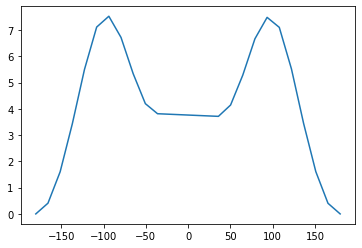

In [36]:
plt.plot(New_d,CORD2_new)

[k1  , k2  , k3 ]
[0.54419889 2.97883325 0.55956036]


Text(0.5, 0, '$\\phi$')

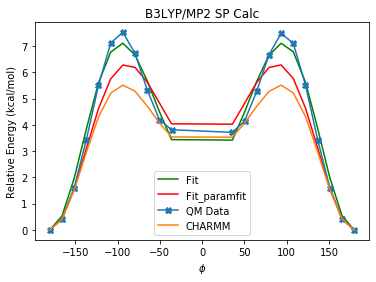

In [37]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n_fix_phi,New_d,CORD2_new,p0=[10,10,10],bounds=((0,0,0),(50,50,50)),maxfev=10000)
New_d=np.asarray(New_d)
print("[k1  , k2  , k3 ]")
print(popt)
plt.figure()
plt.plot(New_d,tor_3_term_fix_n_fix_phi(New_d,*popt),c='g', label='Fit')
plt.plot(New_d,tor_3_term_fix_n_fix_phi(New_d,1.1873,2.3955,0.3332),c='r', label='Fit_paramfit')
plt.plot(New_d,CORD2_new,marker="X",label='QM Data')
plt.plot(New_d,tor_3_term_fix_n_fix_phi(New_d,1,(8.368/4.186),(2.092/4.186)),label="CHARMM")
plt.legend()
plt.title("B3LYP/MP2 SP Calc")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# Other Dieh near to Carbonyl 

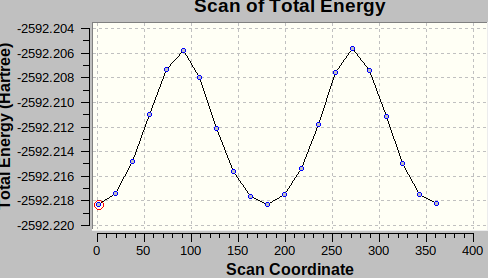

Barrera_L0 = 7.83 kcal/mol

k AMBER  2.175
Max val AMBER 4.35


Text(0, 0.5, 'K (Kcal/mol)')

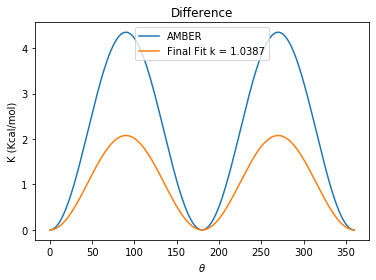

In [38]:
plt.figure()
thetha= np.arange(0,360,0.1)
dieh_AMBER(thetha,180,2,(8.7/4))
dieh_plot(thetha,180,2,1.0387,"Final Fit k = 1.0387")

plt.title("Difference")
plt.xlabel(r'$\theta$')
plt.ylabel("K (Kcal/mol)")

---
# Validation with conjugated chain
---
$\Delta k_{(MP2-B3LYP)}$  = 0.19 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.25 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.14 kcal/mol

K_mp2 =  1.9039
K_b3 =  1.7119
Diff = 0.19199999999999995


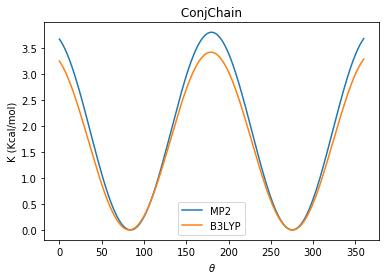

In [39]:
def dieh_plot(theta,phi,n,k,label):
    
    dihedral_CHARM = k*(1+np.cos((n*theta-phi)*np.pi/180))
    plt.plot(thetha,dihedral_CHARM,label=label)
    plt.grid()
    plt.legend()
    
##VALIDATION-- ConjChain
plt.figure()
dieh_plot(thetha,-21.4799,1.8834,1.9039,"MP2")
dieh_plot(thetha,-25.8033,1.8659,1.7119,"B3LYP" )
plt.title(" ConjChain ")
plt.xlabel(r'$\theta$')
plt.ylabel("K (Kcal/mol)")
print("K_mp2 = ",1.9039 )
print("K_b3 = ", 1.7119)
print("Diff =", 1.9039-1.7119)

In [40]:
Mp2_ConjCh0= -617.29628
Mp2_ConjCh1= -617.29572
Mp2_ConjCh10=-617.29536

B3_ConjCh0= -617.32062
B3_ConjCh1= -617.31966
B3_ConjCh10=-617.31947

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf 1")
print((Mp2_ConjCh0-Mp2_ConjCh1)*627.5, "\n")
print("Conf 0 - Conf 10")
print(-(Mp2_ConjCh0-Mp2_ConjCh10)*627.5, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_ConjCh0-B3_ConjCh1, "\n")
print("Conf 0 - Conf 10" )
print(B3_ConjCh0-B3_ConjCh10)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_ConjCh0-Mp2_ConjCh1)-(B3_ConjCh0-B3_ConjCh1))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_ConjCh0-Mp2_ConjCh10)-(B3_ConjCh0-B3_ConjCh10))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 1
-0.35140000004020067 

Conf 0 - Conf 10
0.5773000000405659 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0009599999999636566 

Conf 0 - Conf 10
-0.0011499999999387

 ----------- MP2-B3 0-1--------- 
0.25099999993699385

------------ MP2-B3 0-10-----------
0.14432499992096837


# Validation with CutL0
---
$\Delta k_{(MP2-B3LYP)}$  = 0.19 kcal/mol  
$\Delta\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

K_mp2 =  1.9408
K_b3 =  1.7445
Diff = 0.19630000000000014

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0006799999999884676 

Conf 0 - Conf 10
-0.0004799999999249849 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


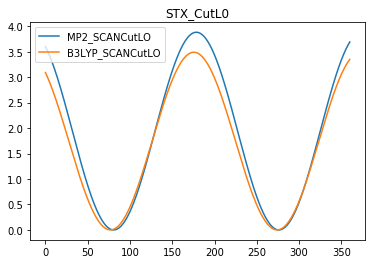

In [41]:
## VALIDATION SCAN CUTL0 -- 
plt.figure()
dieh_plot(thetha,-31.2315,1.8425,1.9408,"MP2_SCANCutLO")
dieh_plot(thetha,-39.4837,1.8266,1.7445,"B3LYP_SCANCutLO")
plt.title("STX_CutL0")
print("K_mp2 = ",1.9408 )
print("K_b3 = ", 1.7445)
print("Diff =", 1.9408-1.7445)
print("")

Mp2_CutL00= -999.92527
Mp2_CutL01= -999.92459
Mp2_CutL010=-999.92479

B3_CutL00= -999.04719
B3_CutL01= -999.04613
B3_CutL010=-999.04663

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL00-Mp2_CutL01, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL00-Mp2_CutL010, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

# Validation with CutL0_OH
---
$\Delta k_{(MP2-B3LYP)}$  = 0.17 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

In [42]:
Mp2_CutL0_OH0= -1232.95092
Mp2_CutL0_OH1= -1232.9504
Mp2_CutL0_OH10=-1232.95005

B3_CutL0_OH0= -1232.25327
B3_CutL0_OH1= -1232.25237
B3_CutL0_OH10=-1232.2524

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL0_OH0-Mp2_CutL0_OH1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL0_OH0-Mp2_CutL0_OH10, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0005200000000513683 

Conf 0 - Conf 10
-0.0008700000000771979 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


k_B3LYP = 1.7342
k_MP2 = 1.9117
DIFF =  0.1775


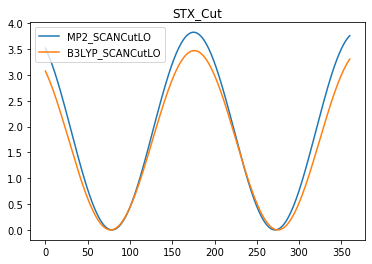

In [43]:
## VALIDATION SCAN CUTL0_OH -- 
plt.figure()
dieh_plot(thetha,-32.9671,1.8671,1.9117,"MP2_SCANCutLO")
dieh_plot(thetha,39.4837,-1.8210,1.7342,"B3LYP_SCANCutLO")
plt.title("STX_Cut")
print("k_B3LYP =", 1.7342 )
print("k_MP2 =",1.9117 )
print("DIFF = ",1.9117 - 1.7342 )

# Validation with CutL0_2
---
$\Delta k_{(MP2-B3LYP)}$  = 0.189 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.23 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.05 kcal/mol

In [44]:
Mp2_CutL02_0= -1228.54782
Mp2_CutL02_1= -1228.54712
Mp2_CutL021_0=-1228.54736

B3_CutL02_0=-1232.49512
B3_CutL02_1= -1232.49401
B3_CutL02_10=-1232.49453

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL02_0-Mp2_CutL02_1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL00-Mp2_CutL010, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL00-B3_CutL01, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL00-B3_CutL01)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL00-Mp2_CutL01)-(B3_CutL00-B3_CutL01))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL00-Mp2_CutL010)-(B3_CutL00-B3_CutL010))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0007000000000516593 

Conf 0 - Conf 10
-0.0004799999999249849 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0010600000000522414 

Conf 0 - Conf 10
-0.0010600000000522414

 ----------- MP2-B3 0-1--------- 
0.23845000004001804

------------ MP2-B3 0-10-----------
0.050200000015934165


k_B3LYP =  1.867
k_MP2 =  1.6771
DIFF = 0.18989999999999996


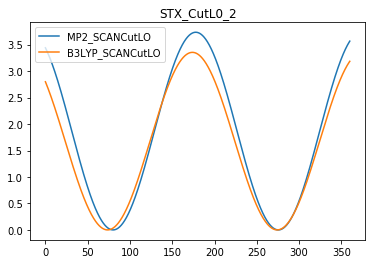

In [45]:
## VALIDATION SCAN CUTL0_2 -- 
dieh_plot(thetha,32.6021,-1.8419,1.8670,"MP2_SCANCutLO")
dieh_plot(thetha,48.0260,-1.7950,1.6771,"B3LYP_SCANCutLO")
plt.title("STX_CutL0_2")
print("k_B3LYP = ",1.8670)
print("k_MP2 = ",1.6771)
print("DIFF =",1.8670 - 1.6771)

# Validation with CutL0_2_OH
---
$\Delta k_{(MP2-B3LYP)}$  = 0.189 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{18.0}) $ (MP2-B3LYP)= 0.26 kcal/mol  
$\Delta E_(\phi_{0.0} -\phi_{180.0}) $ (MP2-B3LYP)= 0.03 kcal/mol

In [46]:
Mp2_CutL02_OH_0= -1232.57343
Mp2_CutL02_OH_1= -1232.57291
Mp2_CutL02_OH_10= -1232.57258

B3_CutL02_OH_0=-1232.70114
B3_CutL02_OH_1=-1232.70019
B3_CutL02_OH_10=-1232.70024

print("------------MP2 ----------------- \n")
print("Conf 0 - Conf ")
print(Mp2_CutL02_OH_0-Mp2_CutL02_OH_1, "\n")
print("Conf 0 - Conf 10")
print(Mp2_CutL02_OH_0-Mp2_CutL02_OH_10, "\n")

print("-------------B3 ------------------ \n")
print("Conf 0 - Conf 1")
print(B3_CutL02_OH_0-B3_CutL02_OH_1, "\n")
print("Conf 0 - Conf 10" )
print(B3_CutL02_OH_0-B3_CutL02_OH_1)
print("\n ----------- MP2-B3 0-1--------- ")
print(((Mp2_CutL02_OH_0-Mp2_CutL02_OH_1)-(B3_CutL02_OH_0-B3_CutL02_OH_1))*627.5)
print("\n------------ MP2-B3 0-10-----------")
print(((Mp2_CutL02_OH_0-Mp2_CutL02_OH_10)-(B3_CutL02_OH_0-B3_CutL02_OH_10))*627.5)

------------MP2 ----------------- 

Conf 0 - Conf 
-0.0005199999998239946 

Conf 0 - Conf 10
-0.0008499999999003194 

-------------B3 ------------------ 

Conf 0 - Conf 1
-0.0009499999998752173 

Conf 0 - Conf 10
-0.0009499999998752173

 ----------- MP2-B3 0-1--------- 
0.26982500003214227

------------ MP2-B3 0-10-----------
0.03137500006346272


k_B3LYP = 1.8676
k_MP2 =  1.6736
DIFF = 0.18989999999999996


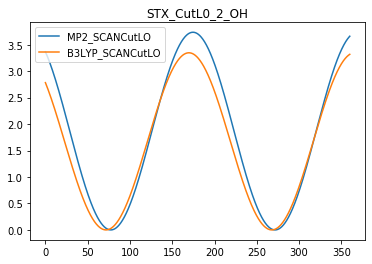

In [47]:
## VALIDATION SCAN CUTL0_2_OH -- 
plt.figure()
dieh_plot(thetha,-36.6469,1.8534,1.8676,"MP2_SCANCutLO")
dieh_plot(thetha,-48.4829,1.8360,1.6736,"B3LYP_SCANCutLO")
plt.title("STX_CutL0_2_OH")
print("k_B3LYP = ",1.8676)
print("k_MP2 = ",1.6736)
print("DIFF =",1.8670 - 1.6771)

# Influence of the increase in the number of conformations 

Text(0.5, 1.0, 'STX _ all  atoms')

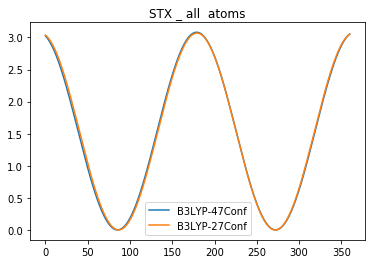

In [48]:
## Adittion of conformations to paramfit. 
plt.figure()
dieh_plot(thetha,-15.6052,1.9266,1.5408,"B3LYP-47Conf" )
dieh_plot(thetha,-11.6995,1.9437,1.5344,"B3LYP-27Conf" )
plt.title("STX _ all  atoms")

# Optimization of C=C-C=C dihedral in STX
---
Original parameters for amber  
C=C-C=C  
C24-C25-C31-C32  
ce-cf-cf-ce  

from frcmod.
ce-cf-cf-ce   4    4.000       180.000           2.000

ce 12.01         0.360          Inner Sp2 carbons in conjugated systems  
cf 12.01         0.360          Inner Sp2 carbons in conjugated systems, identical to ce

C-C=C-C
ce-ce-cf-cf   4   26.600       180.000           2.000  
C25-C31-C32-C35  

---
   ## CHARMM 
   ---
C=C-C=C
CG2DC1  CG2DC1  CG2DC2  CG2DC2
 i         j       k       l       func  phi          k (kjmol)        np  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  0.000000e+00  4.184000e+00      3  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  0.000000e+00  4.184000e+00      3  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  1.800000e+02  8.368000e+00      2  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  1.800000e+02  8.368000e+00      2  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  0.000000e+00  2.092000e+00      1  
 CG2DC1  CG2DC1  CG2DC2  CG2DC2     9  0.000000e+00  2.092000e+00      1  

C-C=C-C 
 i         j       k       l       func  phi          k (kjmol)        np  
 CG2DC1  CG2DC2  CG2DC2  CG2DC1     9  1.800000e+02  2.343040e+00      1  
 CG2DC1  CG2DC2  CG2DC2  CG2DC1     9  1.800000e+02  2.343040e+00      1  
 CG2DC1  CG2DC2  CG2DC2  CG2DC1     9  1.800000e+02  2.928800e+01      2  
 CG2DC1  CG2DC2  CG2DC2  CG2DC1     9  1.800000e+02  2.928800e+01      2  
 


# Diehdral Correction 
\begin{equation*}
\ k_1[1 + cos(n_1\theta - \phi_1)] +\ k_2[1 + cos(n_2\theta - \phi_2)] +\ k_3[1 + cos(n_3\theta - \phi_3)] 
\end{equation*}  

In [49]:
def tor_3_term(x,k1,n1,phi_1,k2,n2,phi_2,k3,n3,phi_3):
    return (k1*(1+np.cos((n1*x-phi_1)*np.pi/180)) + k2*(1+np.cos((n2*x-phi_2)*np.pi/180))+k3*(1+np.cos((n3*x-phi_3)*np.pi/180)))

In [50]:
x= np.linspace(-180,180,300)

# QM_Data
---

In [51]:
#Data extraction and preparation
b3l_qm = np.genfromtxt('qm_b3lyp.dat').tolist()
mp2_qm = np.genfromtxt('qm_mp2.dat').tolist()
init_Dieh=179.8675
Dieh =[]
b3l_qm_Norm=[]
for i in b3l_qm:
    b3l_qm_Norm.append((i-b3l_qm[0])*627.5)
mp2_qm_Norm=[]
for i in mp2_qm:
    mp2_qm_Norm.append((i-mp2_qm[0])*627.5)
for i in range(21):
    Dieh.append(init_Dieh-(i*18.0))

Text(0.5, 0, '$\\phi$')

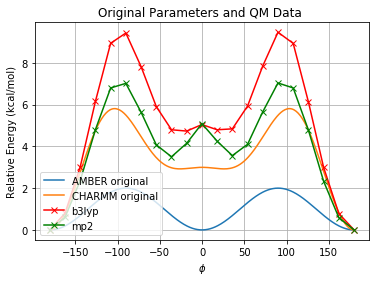

In [52]:
plt.figure()
plt.title("Original Parameters and QM Data ")
thetha=np.linspace(-180,180,360)
dieh_plot(thetha,180.0,2,1,"AMBER original ")
plt.plot(x,tor_3_term(x,(4.18/4.186),3,0,(8.36/4.186),2,180,(2.09/4.186),1,0),label="CHARMM original")
plt.plot(Dieh,b3l_qm_Norm,label="b3lyp",marker="x",c="r")
plt.plot(Dieh,mp2_qm_Norm,label="mp2",marker="x",c="g")
plt.legend(loc=(3))
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

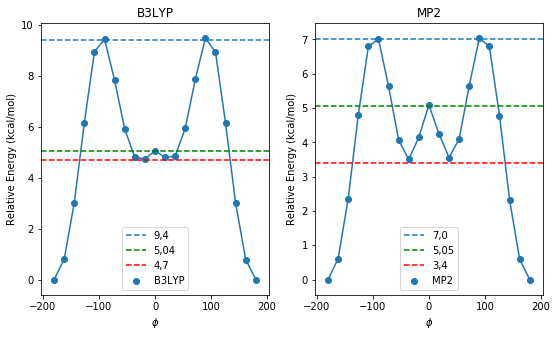

In [53]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.title("B3LYP")
plt.plot(Dieh,b3l_qm_Norm)
plt.scatter(Dieh,b3l_qm_Norm,label="B3LYP")
plt.ylabel("Relative Energy (kcal/mol)")
plt.axhline(9.4,ls="--",label="9,4")
plt.axhline(5.04,ls="--",label="5,04",c='g')
plt.axhline(4.7,ls="--",label="4,7",c='r')
plt.xlabel('$\phi$')
plt.legend()
plt.subplot(1,2,2)
plt.title("MP2")
plt.plot(Dieh,mp2_qm_Norm)
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
plt.scatter(Dieh,mp2_qm_Norm,label="MP2")
plt.axhline(7.0,ls="--",label="7,0")
plt.axhline(5.05,ls="--",label="5,05",c='g')
plt.axhline(3.4,ls="--",label="3,4",c='r')

plt.legend()

Text(0.5, 1.0, 'AMBER')

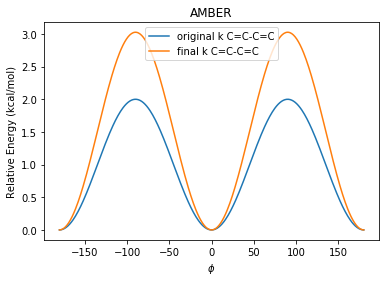

In [54]:
plt.figure()
thetha=np.linspace(-180,180,360)
dieh_plot(thetha,180.0,2,1,"original k C=C-C=C")
dieh_plot(thetha,180.0,2,1.513,"final k C=C-C=C")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
plt.title("AMBER")

[k1 ,n1, phi_1 , k2 ,n2, phi_2 , k3 ,n3, phi_3 ]


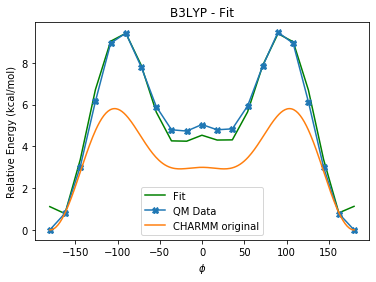

In [55]:
#fit
popt, pcomv = curve_fit(tor_3_term,Dieh,b3l_qm_Norm,p0=[10,2,180,10,2,180,10,2,180],bounds=((0,0,0,0,0,0,0,0,0),(50,5,180,50,5,180,100,5,180)),maxfev=10000)
Dieh=np.asarray(Dieh)
plt.figure()
plt.plot(Dieh,tor_3_term(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,b3l_qm_Norm,label='QM Data',marker='X')
plt.plot(x,tor_3_term(x,(4.18/4.186),3,0,(8.36/4.186),2,180,(2.09/4.186),1,0),label="CHARMM original")
plt.legend(loc=(0))
plt.title("B3LYP - Fit")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
print("[k1 ,n1, phi_1 , k2 ,n2, phi_2 , k3 ,n3, phi_3 ]")


[4.56346068e-02 9.99999762e+00 1.78644799e+02 2.42757768e+00
 2.28933532e+00 1.79391061e+02 1.97943509e+00 3.09150570e+00
 2.91569153e-16]
0.0456346067693411
9.999997617885109
178.64479876713298
2.4275776750328415
2.2893353242114087
179.39106117219586
1.9794350902855893
3.091505702202211
2.915691528195982e-16


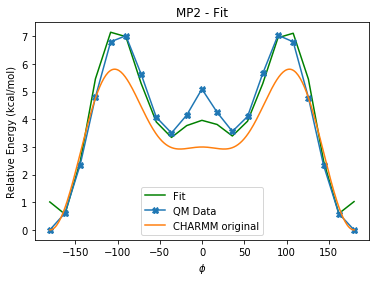

In [56]:
#fit
popt, pcomv = curve_fit(tor_3_term,Dieh,mp2_qm_Norm,p0=[3,2,180,8,2,180,2,2,180],bounds=((0,0,0,0,0,0,0,0,0),(100,10,180,100,10,180,100,10,180)),maxfev=10000)
Dieh=np.asarray(Dieh)
plt.figure()
plt.plot(Dieh,tor_3_term(Dieh,*popt),c='g',label='Fit')
plt.plot(Dieh,mp2_qm_Norm,label='QM Data',marker="X")
plt.plot(x,tor_3_term(x,(4.18/4.186),3,0,(8.36/4.186),2,180,(2.09/4.186),1,0),label="CHARMM original")
plt.legend(loc=(0))
plt.title("MP2 - Fit")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
print(popt)
for i in popt:
    print(i)

# Diehdral Correction 
\begin{equation*}
\ k_1[1 + cos(n_1\theta - \phi_1)] +\ k_2[1 + cos(n_2\theta - \phi_2)] +\ k_3[1 + cos(n_3\theta - \phi_3)] 
\end{equation*}  

|      	| 3 term fit 	|        	|
|:----:	|:----------:	|:------:	|
|      	|    B3LYP   	|   MP2  	|
|  $k_1$  	|    0,23    	|  0,05  	|
|  $n_1$ 	|    4,87    	|  10,00 	|
|$\phi_1$ 	|    1,57    	| 178,64 	|
|  $k_2$  	|    3,54    	|  2,43  	|
|  $n_2$ 	|    2,25    	|  2,29  	|
| $\phi_2$ 	|   179,54   	| 179,39 	|
|  $k_3$  	|    2,04    	|  1,98  	|
|  $n_3$  	|    3,09    	|  3,09  	|
| $\phi_3$ 	|    0,00    	|  0,00  	|

# Fixed $ n_{(n_1 = 1),(n_2 = 2),(n_3 = 3)}$  

|      	| Np_Fix 	|        	|
|:----:	|:------:	|:------:	|
|      	|  B3LYP 	|   MP2  	|
|  $k_1$    	|  0,91  	|  1,02  	|
| $\phi_1$ 	|  0,00  	|  0,00  	|
|  $k_2$    	|  3,29  	|  2,15  	|
| $\phi_2$ 	| 179,44 	| 179,22 	|
|  $k_3$    	|  1,29  	|  1,07  	|
| $\phi_3$ 	|  0,21  	|  0,25  	|

In [57]:
def tor_3_term_fix_n(x,k1,phi_1,k2,phi_2,k3,phi_3):
    return (k1*(1+np.cos((1*x-phi_1)*np.pi/180)) + k2*(1+np.cos((2*x-phi_2)*np.pi/180))+k3*(3+np.cos((x-phi_3)*np.pi/180)))

[k1 , phi_1 , k2 , phi_2 , k3 , phi_3 ]
[1.59791572e+00 1.90089781e-01 3.50047138e+00 1.79440734e+02
 9.95322149e-02 1.79974942e+02]
1.5979157161470998
0.19008978142756883
3.500471383439458
179.44073436978314
0.09953221490528338
179.9749419353627


Text(0.5, 0, '$\\phi$')

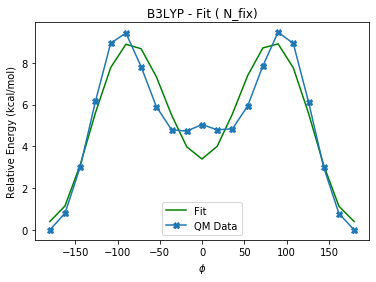

In [58]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n,Dieh,b3l_qm_Norm,p0=[10,180,10,180,10,180],bounds=((0,0,0,0,0,0),(50,180,50,180,100,180)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1 , phi_1 , k2 , phi_2 , k3 , phi_3 ]")
print(popt)
for i in popt:
    print(i)
plt.figure()
plt.plot(Dieh,tor_3_term_fix_n(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,b3l_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.title("B3LYP - Fit ( N_fix)")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')


[k1 , phi_1 , k2 , phi_2 , k3 , phi_3 ]


Text(0.5, 0, '$\\phi$')

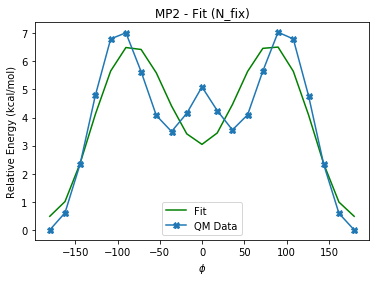

In [59]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n,Dieh,mp2_qm_Norm,bounds=((0,0,0,0,0,0),(50,180,50,180,100,180)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1 , phi_1 , k2 , phi_2 , k3 , phi_3 ]")

plt.figure()
plt.plot(Dieh,tor_3_term_fix_n(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,mp2_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.title("MP2 - Fit (N_fix)")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

# Fixed $ n_{(n_1 = 1),(n_2 = 2),(n_3 = 3)}$ and $\phi_1= 0  ,\phi_2= 180 ,\phi_3= 0$  


|    	| fixed $N_p$ and $\phi$  	|       	|
|:--:	|:--------------:	|:-----:	|
|    	|      B3LYP     	|  MP2  	|
| $k_1$ 	|      1,292     	| 1,067 	|
| $k_2$ 	|      3,294     	|  2,15 	|
| $k_3$ 	|     0,9138     	|  1,01 	|

In [60]:
def tor_3_term_fix_n_fix_phi(x,k1,k2,k3):
    return (k1*(1+np.cos((1*x-0)*np.pi/180)) + k2*(1+np.cos((2*x-180)*np.pi/180))+k3*(1+np.cos((3*x-0)*np.pi/180)))

[k1  , k2  , k3 ]
[1.29217085 3.29410109 0.91381379]


Text(0.5, 0, '$\\phi$')

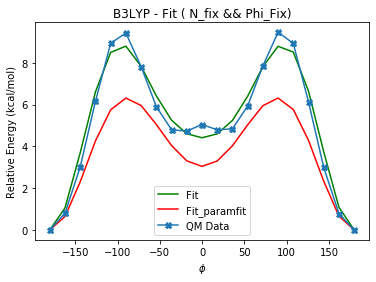

In [61]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n_fix_phi,Dieh,b3l_qm_Norm,p0=[10,10,10],bounds=((0,0,0),(50,50,50)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1  , k2  , k3 ]")
print(popt)
plt.figure()
plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,1.1873,2.3955,0.3332),c='r', label='Fit_paramfit')
plt.plot(Dieh,b3l_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.title("B3LYP - Fit ( N_fix && Phi_Fix)")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

[k1  , k2  , k3 ]
[1.06746376 2.1544624  1.01554895]


Text(0.5, 1.0, 'MP2 - Fit ( N_fix && Phi_Fix)')

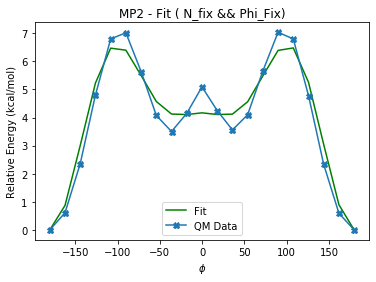

In [62]:
#fit
popt, pcomv = curve_fit(tor_3_term_fix_n_fix_phi,Dieh,mp2_qm_Norm,p0=[10,10,10],bounds=((0,0,0),(50,50,50)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1  , k2  , k3 ]")
print(popt)
plt.figure()
plt.plot(Dieh,tor_3_term_fix_n_fix_phi(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,mp2_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
plt.title("MP2 - Fit ( N_fix && Phi_Fix)")

# Four term torsion

In [63]:
def tor_4_term_fix_n_fix_phi(x,k1,k2,k3,k4):
    return (k1*(1+np.cos((1*x-0)*np.pi/180)) + k2*(1+np.cos((2*x-180)*np.pi/180))+k3*(1+np.cos((3*x-0)*np.pi/180))+k4*(1+np.cos((4*x-0)*np.pi/180)))

[k1  , k2  , k3 ,k4]
[1.22618032 3.22811019 0.84782227 0.23096816]


Text(0.5, 0, '$\\phi$')

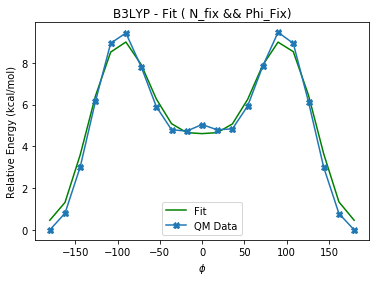

In [64]:
#fit
popt, pcomv = curve_fit(tor_4_term_fix_n_fix_phi,Dieh,b3l_qm_Norm,p0=[10,10,10,10],bounds=((0,0,0,0),(50,50,50,50)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1  , k2  , k3 ,k4]")
print(popt)
plt.figure()
plt.plot(Dieh,tor_4_term_fix_n_fix_phi(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,b3l_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.title("B3LYP - Fit ( N_fix && Phi_Fix)")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')

[k1  , k2  , k3 ,k4]
[0.9947396  2.08173784 0.9428237  0.25453598]


Text(0.5, 1.0, 'MP2 - Fit ( N_fix && Phi_Fix)')

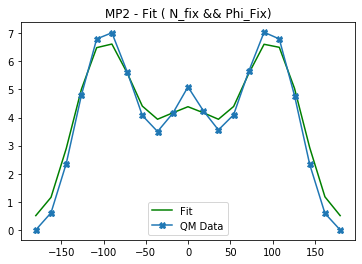

In [65]:
#fit
popt, pcomv = curve_fit(tor_4_term_fix_n_fix_phi,Dieh,mp2_qm_Norm,p0=[10,10,10,10],bounds=((0,0,0,0),(50,50,50,50)),maxfev=10000)
Dieh=np.asarray(Dieh)
print("[k1  , k2  , k3 ,k4]")
print(popt)
plt.figure()
plt.plot(Dieh,tor_4_term_fix_n_fix_phi(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,mp2_qm_Norm,marker="X",label='QM Data')
plt.legend()
plt.title("MP2 - Fit ( N_fix && Phi_Fix)")

# Comparison with parmfiti and scipy fit

In [66]:
#Data extraction and preparation
b3l_qm = np.genfromtxt('qm_26con_L0.dat').tolist()
init_Dieh=179.8675
Dieh_L026 =[]
b3l_26_L0_qm_Norm=[]
for i in b3l_qm:
    b3l_26_L0_qm_Norm.append((i-b3l_qm[25])*627.5)
for i in range(26):
    Dieh_L026.append(init_Dieh-(i*14.4))

In [67]:
print(np.argmin(b3l_qm))

25


k CHARMM  1.4034878165312947
Max val CHARMM 2.806921894415566
k AMBER  2.175
Max val AMBER 4.34991672064702


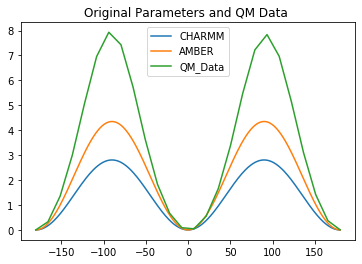

In [68]:
plt.figure()
plt.title("Original Parameters and QM Data ")
thetha=np.linspace(-180,180,360)
dieh_CHARM(thetha,180,2,(5.875/4.186))
## amber frcmod X-X-X-X 4(divider) 8.7(barrier) 180 (phase) 2(multiplicity)
## k = (barrier/divider)
dieh_AMBER(thetha,180,2,(8.7/4))
plt.plot(Dieh_L026,b3l_26_L0_qm_Norm,label="QM_Data")
plt.legend()

In [69]:
def dih_1term(x,k1):
    return (k1*(1+np.cos((2*x-180)*np.pi/180)))

[3.6247824]


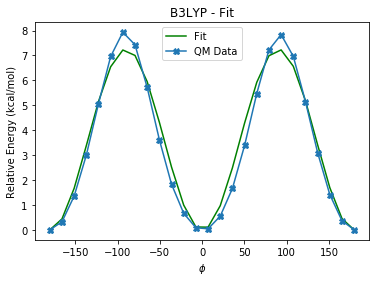

In [70]:
#fit
popt, pcomv = curve_fit(dih_1term,Dieh_L026,b3l_26_L0_qm_Norm,maxfev=10000)
Dieh=np.asarray(Dieh_L026)
plt.figure()
plt.plot(Dieh,dih_1term(Dieh,*popt),c='g', label='Fit')
plt.plot(Dieh,b3l_26_L0_qm_Norm,label='QM Data',marker='X')
#plt.plot(x,tor_3_term(x,(4.18/4.186),3,0,(8.36/4.186),2,180,(2.09/4.186),1,0),label="CHARMM original")
plt.legend(loc=(0))
plt.title("B3LYP - Fit")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
print(popt)


[3.87701654e-05 4.56471946e-01 1.69670280e+00 3.41391479e+00
 5.18329260e+00 6.56711582e+00 7.22304506e+00 6.98881219e+00
 5.92236329e+00 4.28752358e+00 2.48873055e+00 9.70981577e-01
 1.09747470e-01 1.18086043e-01 9.93934446e-01 2.52061948e+00
 4.32045968e+00 5.94819861e+00 7.00115541e+00 7.21884263e+00
 6.54740738e+00 5.15295375e+00 3.38045094e+00 1.66839248e+00
 4.40318742e-01 3.87701654e-05]


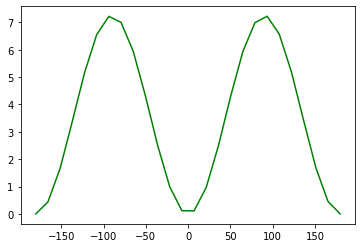

In [71]:
t = dih_1term(Dieh,*popt)
print(t)
plt.plot(Dieh,dih_1term(Dieh,*popt),c='g', label='Fit')

In [72]:
gmx_testx2 = np.genfromtxt('/home/david/Documents/FFParmOpt/Literatute/26_conx2.txt')

In [73]:
gmx_testx2[:,3]

array([59403908., 53214536., 48116812., 45122084., 42524004., 43176076.,
       44548716., 46125352., 44976340., 49346372., 55098696., 58306768.,
       66283828., 74704064., 81851456., 84522464., 87254512., 88959976.,
       87788072., 87389000., 85367200., 82374224., 77682072., 72675840.,
       66130152., 58085160.])

In [74]:
init_Dieh_26=-179.4982
Dieh_26=[]
for i in range(26):
    Dieh_26.append(init_Dieh_26+(i*14.4))

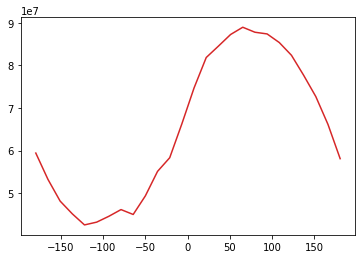

In [75]:
plt.figure()
plt.plot(Dieh_26,gmx_testx2)

In [76]:
gmx_en_26_Norm =[]
for i in b3l_qm:
    b3l_qm_Norm.append((i-b3l_qm[0])*627.5)
mp2_qm_Norm=[]
for i in mp2_qm:
    mp2_qm_Norm.append((i-mp2_qm[0])*627.5)

In [77]:
%gui qt

from PyQt5.QtWidgets import QFileDialog

def gui_fname(dir=None):
    """Select a file via a dialog and return the file name."""
    if dir is None: dir ='./'
    fname = QFileDialog.getOpenFileName(None, "Select data file...", 
                dir, filter="All files (*);; SM Files (*.sm)")
    return fname[0]
                                                          

In [78]:
data_cor2 = np.genfromtxt("/home/david/Documents/FFParmOpt/CORD2_SP/fit_justK/fit_output_energy.dat")

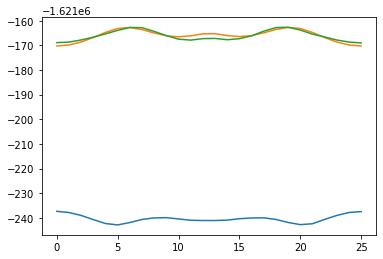

In [79]:
plt.plot(data_cor2[:,0],data_cor2[:,3])
plt.plot(data_cor2[:,0],data_cor2[:,2])
plt.plot(data_cor2[:,0],data_cor2[:,1])

In [80]:
initi_amb= data_cor2[:,3]
fina_amb=data_cor2[:,1]

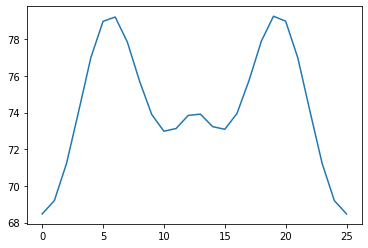

In [81]:
plt.plot(data_cor2[:,0],fina_amb-initi_amb)

In [82]:
fina_amb-initi_amb

array([68.47145, 69.19335, 71.22238, 74.07188, 76.99464, 78.96991,
       79.20679, 77.83417, 75.71082, 73.89087, 72.97988, 73.12758,
       73.84194, 73.91107, 73.23169, 73.08469, 73.9442 , 75.76449,
       77.88525, 79.24871, 78.97981, 76.97664, 74.05961, 71.21467,
       69.19471, 68.47157])

In [83]:
k = -1621240.407153

In [84]:
initi_amb

array([-1621237.36613, -1621237.86225, -1621239.0326 , -1621240.73564,
       -1621242.32808, -1621242.88688, -1621241.9228 , -1621240.67021,
       -1621240.04692, -1621239.93516, -1621240.46554, -1621240.99217,
       -1621241.10674, -1621241.09193, -1621240.9413 , -1621240.36281,
       -1621240.0756 , -1621240.00972, -1621240.66604, -1621241.89262,
       -1621242.77224, -1621242.40864, -1621240.64502, -1621239.04227,
       -1621237.84678, -1621237.47987])

In [85]:
fina_amb


array([-1621168.89468, -1621168.6689 , -1621167.81022, -1621166.66376,
       -1621165.33344, -1621163.91697, -1621162.71601, -1621162.83604,
       -1621164.3361 , -1621166.04429, -1621167.48566, -1621167.86459,
       -1621167.2648 , -1621167.18086, -1621167.70961, -1621167.27812,
       -1621166.1314 , -1621164.24523, -1621162.78079, -1621162.64391,
       -1621163.79243, -1621165.432  , -1621166.58541, -1621167.8276 ,
       -1621168.65207, -1621169.0083 ])

For L0 


In [86]:
L0_dat = np.genfromtxt("/home/david/Documents/FFParmOpt/L0_CORD1_26_Conf_FINAL/fit_output_energy.dat")

In [87]:
L0_dat[:,1]

array([-1626645.06692, -1626644.4826 , -1626642.84788, -1626640.48568,
       -1626637.41144, -1626634.74469, -1626633.67016, -1626634.66486,
       -1626637.05449, -1626640.15234, -1626642.83351, -1626644.4951 ,
       -1626645.43706, -1626645.44557, -1626644.62427, -1626642.58899,
       -1626639.77092, -1626636.85232, -1626634.43857, -1626633.74286,
       -1626635.21966, -1626637.86133, -1626640.93688, -1626643.24824,
       -1626644.67354, -1626644.92495])

In [88]:
L0_dat[:,3]

array([-1626704.63611, -1626704.282  , -1626703.35579, -1626702.17908,
       -1626700.58846, -1626699.22198, -1626698.78357, -1626699.3184 ,
       -1626700.36126, -1626701.91532, -1626703.40224, -1626704.36661,
       -1626705.02077, -1626705.05825, -1626704.56797, -1626703.26637,
       -1626701.69471, -1626700.34786, -1626699.26527, -1626698.957  ,
       -1626699.74272, -1626701.02463, -1626702.60199, -1626703.74487,
       -1626704.46025, -1626704.48792])

In [89]:
diff =L0_dat[:,1]-L0_dat[:,3]
diff

array([59.56919, 59.7994 , 60.50791, 61.6934 , 63.17702, 64.47729,
       65.11341, 64.65354, 63.30677, 61.76298, 60.56873, 59.87151,
       59.58371, 59.61268, 59.9437 , 60.67738, 61.92379, 63.49554,
       64.8267 , 65.21414, 64.52306, 63.1633 , 61.66511, 60.49663,
       59.78671, 59.56297])

In [90]:
new_amb =[]
for i,j in enumerate(diff):
    new_amb.append(j + (L0_dat[:,3][i]))

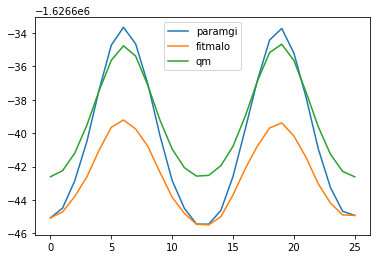

In [91]:
plt.plot(L0_dat[:,0],L0_dat[:,1],label="paramgi")
plt.plot(L0_dat[:,0],L0_dat[:,3]+diff[0],label="fitmalo")
plt.plot(L0_dat[:,0],L0_dat[:,2],label="qm")
#plt.plot(L0_dat[:,0],L0_dat[:,3])
plt.legend()

# CORTE CON_CHAIN

In [92]:
con_cha = np.genfromtxt("./qm_data_Con_CHAIN.dat")
print(np.argmin(con_cha))

0


In [93]:
#Data extraction and preparation
init_Dieh_21=179.8675
Dieh_21 =[]
Con_chain_Norm=[]
for i in con_cha.tolist():
    Con_chain_Norm.append((i-con_cha[0])*627.5)
for i in range(21):
    Dieh_21.append(init_Dieh-(i*18.0))

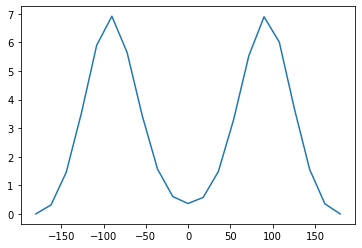

In [94]:
plt.figure()
plt.plot(Dieh_21,Con_chain_Norm)

[3.07226003]


Text(0.5, 0, '$\\phi$')

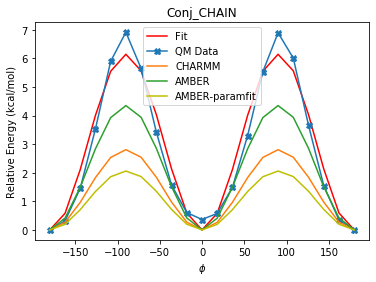

In [95]:
popt, pcomv = curve_fit(Dieh_1ter,Dieh_21,Con_chain_Norm,p0=[1],bounds=((0),(100)),maxfev=10000)
Dieh=np.asarray(Dieh_21)
print(popt)
plt.figure()
plt.plot(Dieh,Dieh_1ter(Dieh,*popt),c='r',label='Fit')
plt.plot(Dieh,Con_chain_Norm,label='QM Data',marker="X")
plt.plot(Dieh,Dieh_1ter(Dieh,(5.875/4.186)),label="CHARMM")
plt.plot(Dieh,Dieh_1ter(Dieh,(2.175)),label="AMBER")
plt.plot(Dieh,Dieh_1ter(Dieh,(1.03)),c='y',label="AMBER-paramfit")
plt.legend(loc=(0))
plt.title("Conj_CHAIN")
plt.ylabel("Relative Energy (kcal/mol)")
plt.xlabel('$\phi$')
